INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


              ds    y
15342 1810-01-01   87
15343 1810-01-02  147
15344 1810-01-03  291
15345 1810-01-04  237
15346 1810-01-05  145


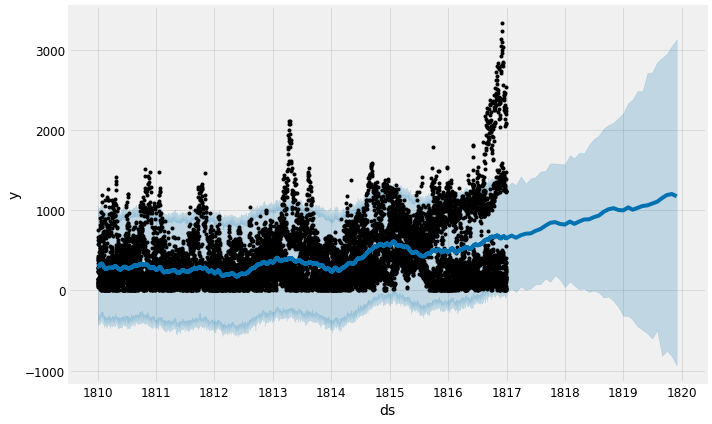

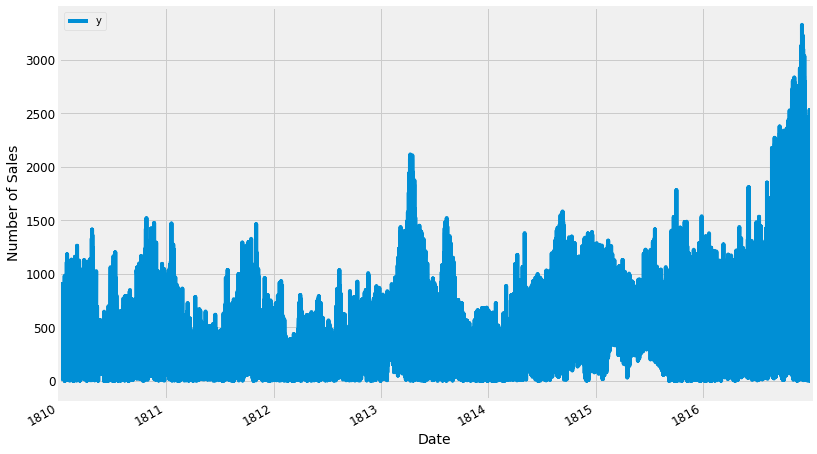

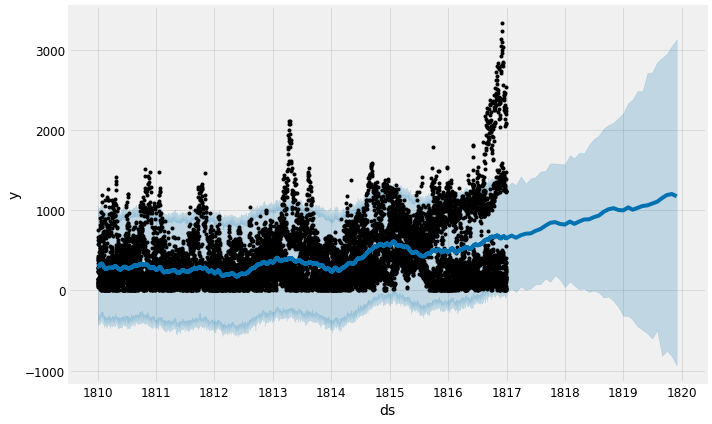

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
from fbprophet import Prophet
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

dataBulletsSales = pd.read_csv('C:\\Users\\User\\Desktop\\Test\\bullets_sales.csv')

dataBulletsSales = dataBulletsSales.loc[dataBulletsSales['Channel'] == 'RS']

dataBulletsSales = dataBulletsSales[['Date','Quantity']]
dataBulletsSales['Date'] = pd.DatetimeIndex(dataBulletsSales['Date'])
dataBulletsSales.dtypes
dataBulletsSales = dataBulletsSales.rename(columns={'Date': 'ds', 'Quantity': 'y'})
print(dataBulletsSales.head(5))
ax = dataBulletsSales.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Date')
# plt.show()

my_model = Prophet(interval_width=0.95)

my_model.fit(dataBulletsSales)

future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
my_model.plot(forecast,
              uncertainty=True)
